# Training a Decision Tree Scikit-Learn Library

In [1]:
from sklearn import tree


In [2]:
X = [[0,0],[1,2]]
y = [0,1]

In [3]:
clf = tree.DecisionTreeClassifier()

In [4]:
clf = clf.fit(X,y)

In [5]:
clf.predict([[1.,1.]])

array([1])

In [6]:
clf.predict_proba([[2.,2.]])

array([[0., 1.]])

In [7]:
clf.predict([[0.4,1.2]])

array([0])

In [8]:
clf.predict_proba([[0.4,1.2]])

array([[1., 0.]])

In [9]:
M = [[0,0],[1,2],[8,9]]
n = [0,1,2]

In [10]:
clf = clf.fit(M,n)

In [11]:
clf.predict([[1,2]])

array([1])

In [12]:
clf.predict_proba([[1,2]])

array([[0., 1., 0.]])

In [13]:
clf.predict([[1,9]])

array([2])

In [14]:
clf.predict_proba([[1,9]])

array([[0., 0., 1.]])

# Applying to Iris Dataset

In [15]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()

In [16]:
iris.data[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [17]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [18]:
X = iris.data[:, 2:]

In [19]:
y = iris.target

In [20]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [21]:
clf = tree.DecisionTreeClassifier(random_state=42)

In [22]:
clf = clf.fit(X,y)

In [23]:
from  sklearn.tree import export_graphviz

In [24]:
export_graphviz(clf, 
               out_file="tree.dot",
               feature_names = iris.feature_names[2:],
               class_names = iris.target_names,
               rounded = True,
               filled = True
               )

In [25]:
import graphviz


<img src="tree.png" width="60%" height="60%">

## Graphviz

In [29]:
import graphviz

In [30]:
dot_data = tree.export_graphviz(clf, 
                                out_file=None,        
                                feature_names = iris.feature_names[2:],
                                class_names = iris.target_names,
                                rounded = True,
                                filled = True)

NameError: name 'clf' is not defined

In [31]:
graph = graphviz.Source(dot_data)

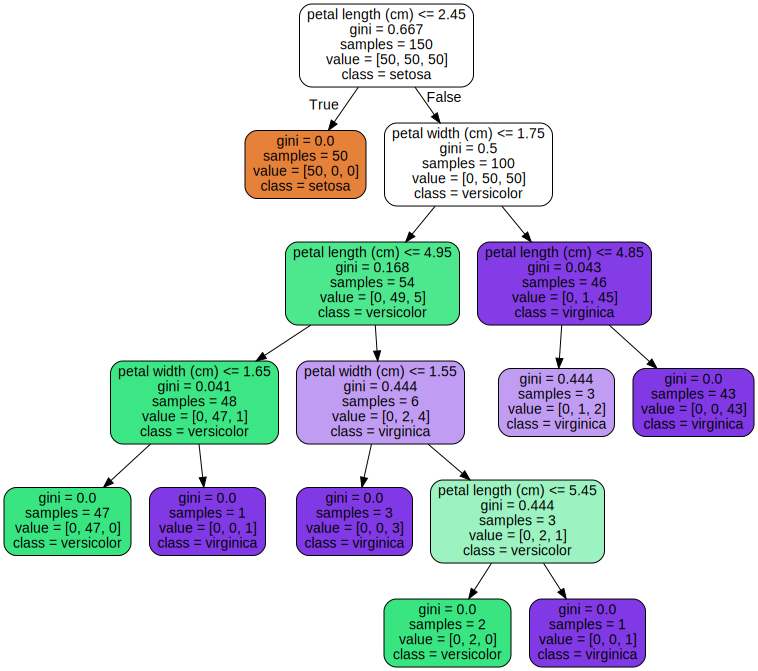

In [29]:
graph

## Visiualize the Decision Boundary

In [30]:
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [32]:
col = ['petal_length', 'petal_width']
X = df.loc[:, col]

In [33]:
species_to_num = {'setosa': 0,
                  'versicolor': 1,
                  'virginica': 2}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']

In [34]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

In [35]:
Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

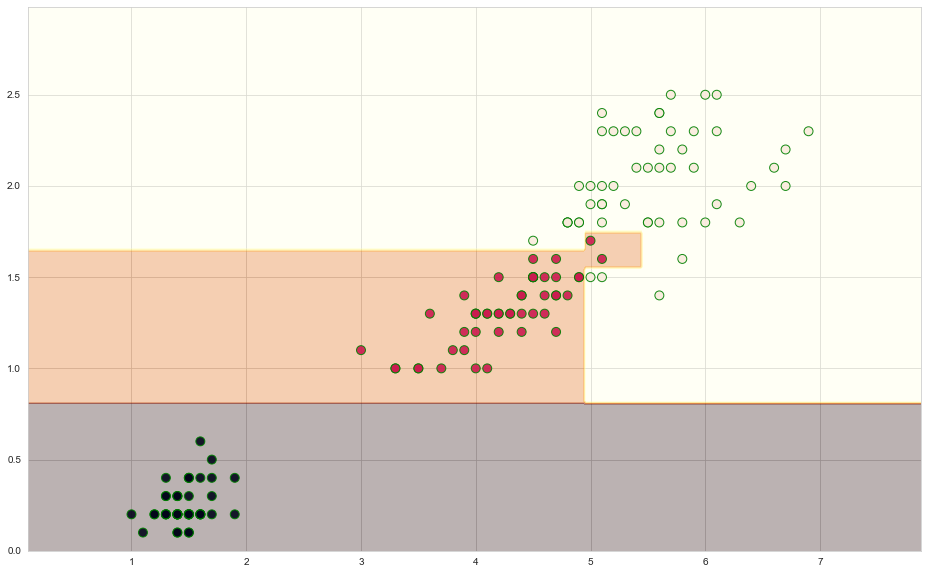

In [38]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(16,10))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3);
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=80, 
            alpha=0.9, edgecolors='g');

## Decision Tree Learning

In [1]:
from sklearn import tree

In [2]:
X = [[0,0],[3,3]]
y = [0.75,3]

In [4]:
tree_reg = tree.DecisionTreeRegressor(random_state=42)

In [5]:
tree_reg = tree_reg.fit(X,y)

In [7]:
tree_reg.predict([[1.5,1.5]])

array([0.75])

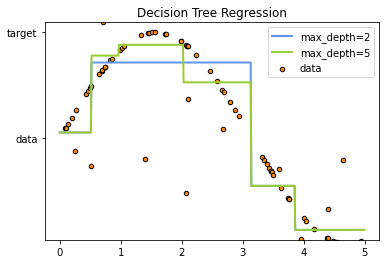

In [25]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

#create random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80,1), axis=0)
y = np.sin(X).ravel()
y[::5]+=3*(0.5 -rng.rand(16))

#fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5, min_samples_leaf=10)
regr_1.fit(X,y)
regr_2.fit(X,y)

#Predict
X_test = np.arange(0.0,5.0,0.01)[:,np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

#plot the results
plt.figure()
plt.scatter(X,y, s=20, edgecolor='black',
           c='darkorange', label='data')
plt.plot(X_test,y_1, color='cornflowerblue',
       label='max_depth=2', linewidth=2)

plt.plot(X_test,y_2, color='yellowgreen',
       label='max_depth=5', linewidth=2)
plt.plot("data")
plt.plot("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()


In [36]:
dot_data = tree.export_graphviz(regr_1, out_file=None,
                               filled = True)

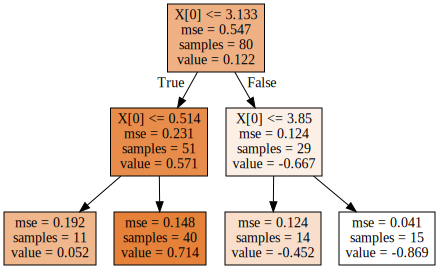

In [37]:
graph = graphviz.Source(dot_data)
graph

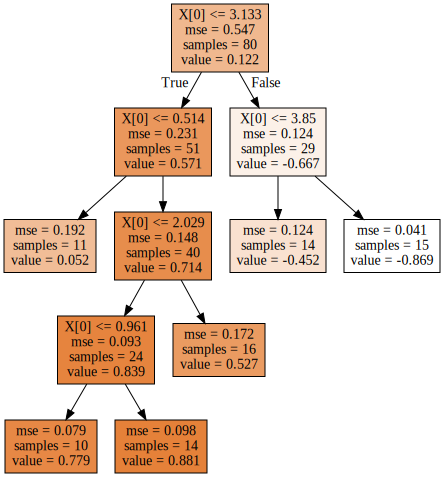

In [38]:
dot_data = tree.export_graphviz(regr_2, out_file=None,
                               filled = True)
graph = graphviz.Source(dot_data)
graph


# Overfitting


In [7]:
from sklearn.datasets import load_iris
from sklearn import tree
import graphviz
iris = load_iris()

In [8]:
X = iris.data[:, 0:2]
y = iris.target
clf = tree.DecisionTreeClassifier(random_state=42)
clf = clf.fit(X,y)

In [9]:
dot_data = tree.export_graphviz(clf, out_file=None,
                               feature_names = iris.feature_names[2:],
                               class_names = iris.target_names,
                               rounded = True,
                               filled = True)

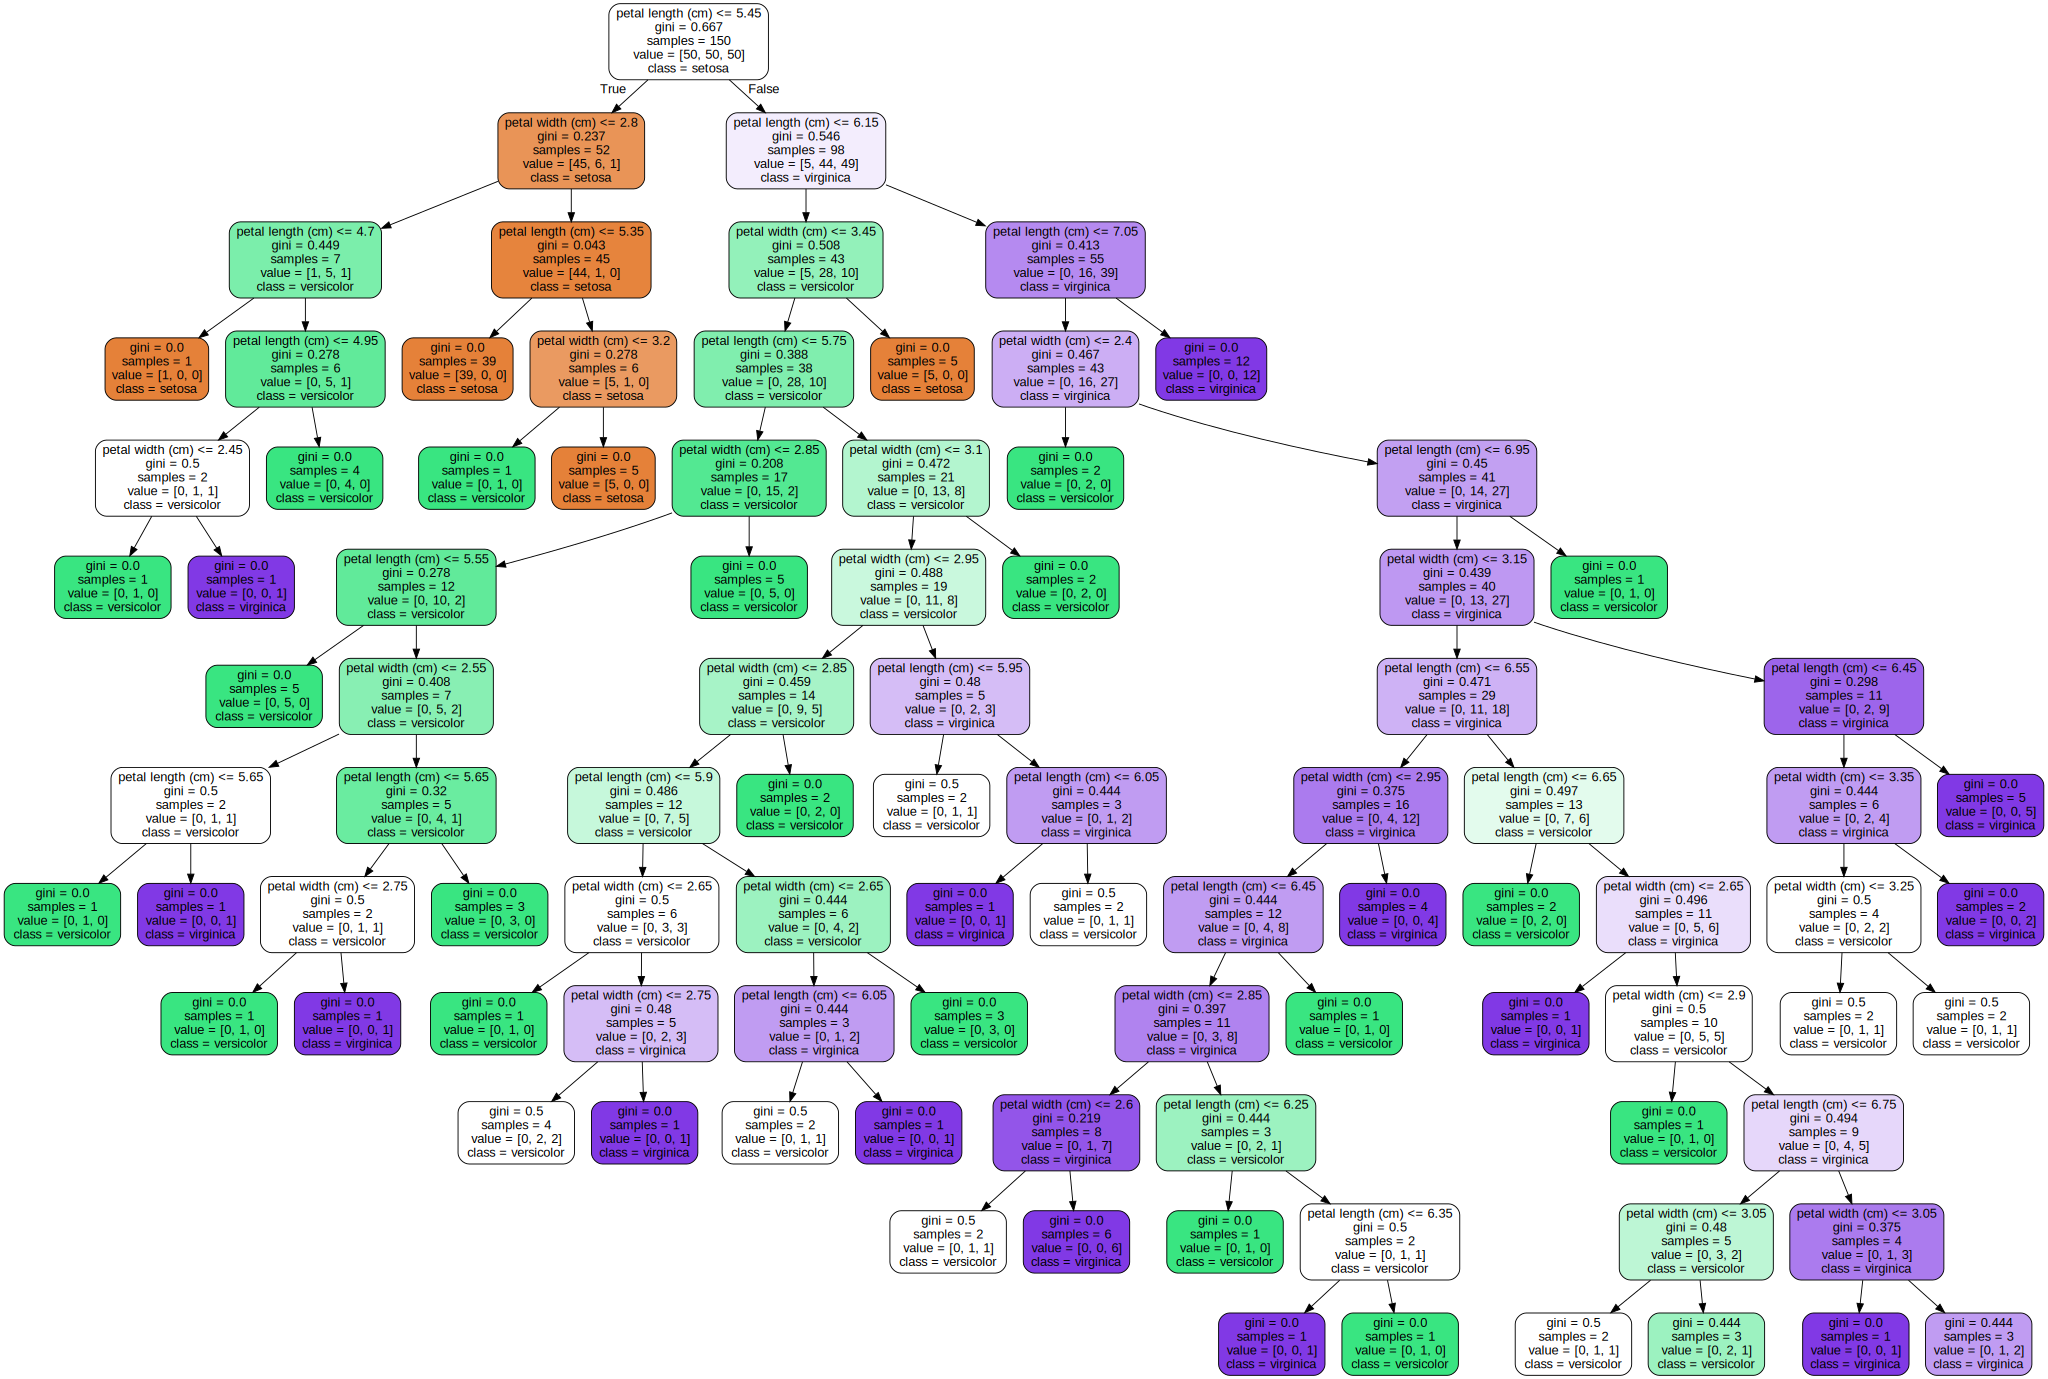

In [10]:
graph = graphviz.Source(dot_data)
graph

# Modeling End to End with Decision Tree

In [11]:
from sklearn.datasets import make_moons

In [14]:
X_data, y_data = make_moons(n_samples = 1000, noise = 0.5, random_state=42)

In [13]:
make_moons?

In [16]:
cl1 = tree.DecisionTreeClassifier(random_state=42)
cl2 = tree.DecisionTreeClassifier(min_samples_leaf=10, random_state=42)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.1, random_state=42)

In [24]:
from sklearn.model_selection import GridSearchCV

In [43]:
params ={'min_samples_leaf': list(range(5, 20))}

In [44]:
grid_search_cv = GridSearchCV(tree.DecisionTreeClassifier(random_state=42), params, n_jobs=-1, verbose=1)

grid_search_cv.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_samples_leaf': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                              15, 16, 17, 18, 19]},
             verbose=1)

In [45]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(min_samples_leaf=16, random_state=42)

In [46]:
from sklearn.metrics import accuracy_score

In [47]:
y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.83

In [48]:
cl1.fit(X_train, y_train) 
y_pred = cl1.predict(X_test)
accuracy_score(y_test, y_pred)

0.74

In [49]:
cl2.fit(X_train, y_train) 
y_pred = cl2.predict(X_test)
accuracy_score(y_test, y_pred)

0.84

In [50]:
cl1.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

# Project HR

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [57]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [58]:
df.shape

(1470, 35)

In [59]:
df.pop('EmployeeNumber')
df.pop('Over18')
df.pop('StandardHours')
df.pop('EmployeeCount')

0       1
1       1
2       1
3       1
4       1
       ..
1465    1
1466    1
1467    1
1468    1
1469    1
Name: EmployeeCount, Length: 1470, dtype: int64

In [61]:
df.shape

(1470, 31)

In [63]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [64]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [65]:
y = df['Attrition']

X = df

X.pop('Attrition')

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

In [66]:
y.unique()

array(['Yes', 'No'], dtype=object)

In [67]:
from sklearn import preprocessing

In [68]:
le = preprocessing.LabelBinarizer()

In [69]:
y = le.fit_transform(y)

In [73]:
y.shape

(1470, 1)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   BusinessTravel            1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   HourlyRate                1470 non-null   int64 
 10  JobInvolvement            1470 non-null   int64 
 11  JobLevel                  1470 non-null   int64 
 12  JobRole                   1470 non-null   object
 13  JobSatisfaction           1470 non-null   int64 
 14  MaritalStatus           

In [72]:
df.select_dtypes(['object'])

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No


In [76]:
ind_BusinessTravel = pd.get_dummies(df['BusinessTravel'], prefix='BusinessTravel')
ind_Department = pd.get_dummies(df['Department'], prefix='Department')
ind_EducationField = pd.get_dummies(df['EducationField'], prefix='EducationField')
ind_Gender = pd.get_dummies(df['Gender'], prefix='Gender')
ind_JobRole = pd.get_dummies(df['JobRole'], prefix='JobRole')
ind_MaritalStatus = pd.get_dummies(df['MaritalStatus'], prefix='MaritalStatus')
ind_OverTime = pd.get_dummies(df['OverTime'], prefix='OverTime')


In [77]:
ind_BusinessTravel.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely
0,0,0,1
1,0,1,0
2,0,0,1
3,0,1,0
4,0,0,1


In [79]:
df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [81]:
df1 = pd.concat([ind_BusinessTravel,ind_Department,ind_EducationField,
                 ind_Gender,ind_JobRole,ind_MaritalStatus,ind_OverTime])

In [83]:
df.select_dtypes(['int64'])

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,...,3,4,0,17,3,2,9,6,0,8


In [84]:
df1 = pd.concat([ind_BusinessTravel,ind_Department,ind_EducationField,
                 ind_Gender,ind_JobRole,ind_MaritalStatus,ind_OverTime, df.select_dtypes(['int64'])],axis=1)

In [85]:
df1.shape

(1470, 51)

# Decision Tree

In [87]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(df1,y)

In [89]:
from sklearn.tree import DecisionTreeClassifier

In [90]:
clf = DecisionTreeClassifier(random_state=42)

In [91]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [104]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [105]:
confusion_matrix(y_train, clf.predict(X_train))

array([[918,   0],
       [  0, 184]], dtype=int64)

In [106]:
accuracy_score(y_train,clf.predict(X_train))

1.0

In [107]:
print(classification_report(y_train,clf.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       918
           1       1.00      1.00      1.00       184

    accuracy                           1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102



In [108]:
accuracy_score(y_test,clf.predict(X_test))

0.8097826086956522

In [109]:
print(classification_report(y_test,clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       315
           1       0.33      0.30      0.31        53

    accuracy                           0.81       368
   macro avg       0.61      0.60      0.60       368
weighted avg       0.80      0.81      0.81       368



In [110]:
confusion_matrix(y_test, clf.predict(X_test))

array([[282,  33],
       [ 37,  16]], dtype=int64)